# Thai Voice Dataset Explorer

This notebook downloads and explores the Thai-Voice dataset from HuggingFace, displaying it in a table format with audio playback capabilities.

## 1. Install Required Packages

In [11]:
# Install required packages
!pip install datasets pandas ipython soundfile librosa matplotlib seaborn plotly ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]


## 2. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datasets import load_dataset
from IPython.display import Audio, display, HTML
import io
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


/home/money/anaconda3/envs/thaidataset/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3. Load Thai-Voice Dataset

In [13]:
# Load the Thai-Voice dataset
print("📥 Loading Thai-Voice dataset from HuggingFace...")

try:
    # Load the dataset
    dataset = load_dataset("Thanarit/Thai-Voice", split="train")
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Total samples: {len(dataset)}")
    print(f"🔍 Features: {list(dataset.features.keys())}")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("Make sure you have access to the Thanarit/Thai-Voice dataset")

📥 Loading Thai-Voice dataset from HuggingFace...


Generating train split: 100%|██████████| 5/5 [00:00<00:00, 2104.73 examples/s]

✅ Dataset loaded successfully!
📊 Total samples: 5
🔍 Features: ['ID', 'Language', 'audio', 'transcript', 'length']


## 4. Dataset Overview and Statistics

In [5]:
# Convert to pandas DataFrame for easier manipulation
print("🔄 Converting to pandas DataFrame...")

# Create DataFrame with basic info (without audio data for performance)
df_info = pd.DataFrame({
    'ID': [sample['ID'] for sample in dataset],
    'Language': [sample['Language'] for sample in dataset],
    'transcript': [sample['transcript'] for sample in dataset],
    'length': [sample['length'] for sample in dataset]
})

print(f"✅ DataFrame created with {len(df_info)} rows")

# Display basic statistics
print("\n📈 Dataset Statistics:")
print(f"Total samples: {len(df_info)}")
print(f"Total audio duration: {df_info['length'].sum():.2f} seconds ({df_info['length'].sum()/3600:.2f} hours)")
print(f"Average audio length: {df_info['length'].mean():.2f} seconds")
print(f"Min audio length: {df_info['length'].min():.2f} seconds")
print(f"Max audio length: {df_info['length'].max():.2f} seconds")
print(f"Languages: {df_info['Language'].unique()}")

🔄 Converting to pandas DataFrame...
✅ DataFrame created with 1 rows

📈 Dataset Statistics:
Total samples: 1
Total audio duration: 4.48 seconds (0.00 hours)
Average audio length: 4.48 seconds
Min audio length: 4.48 seconds
Max audio length: 4.48 seconds
Languages: ['th']


## 5. Data Visualizations

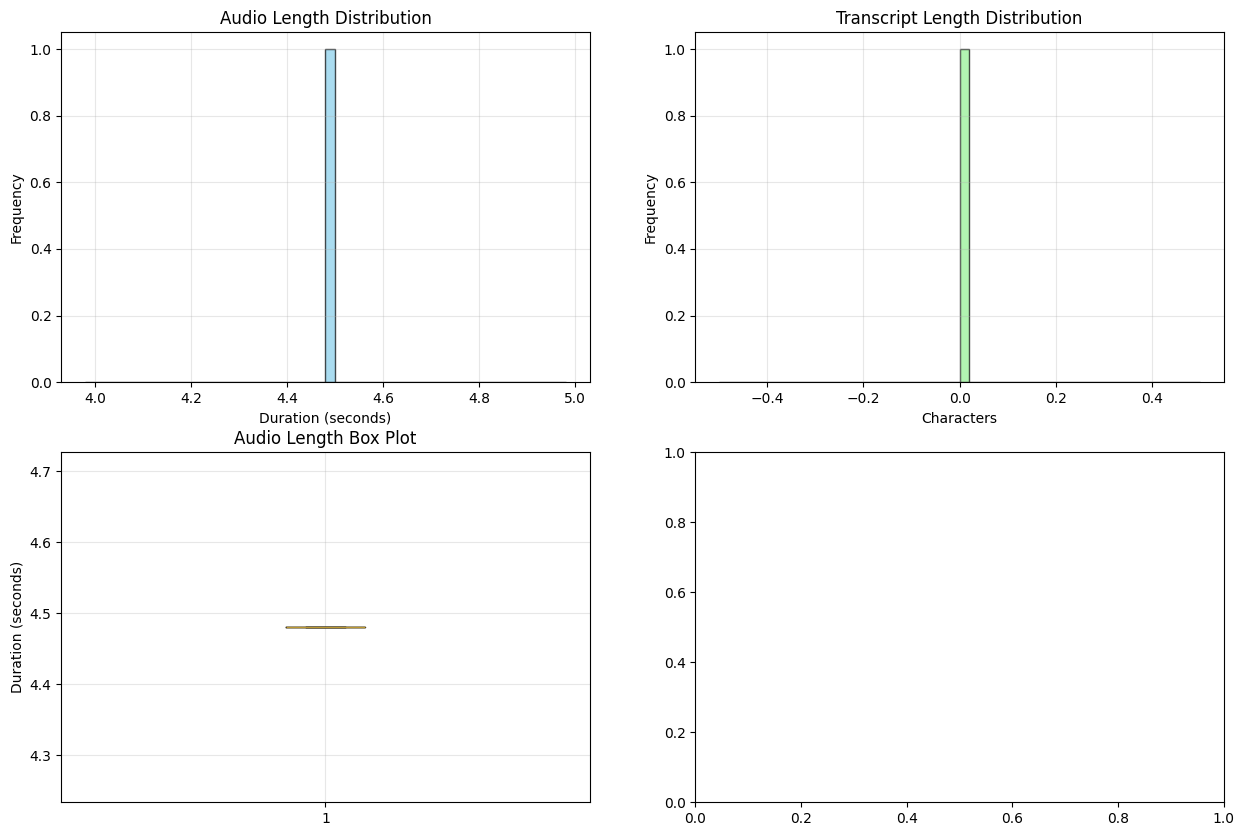

In [12]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Audio length distribution
axes[0, 0].hist(df_info['length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Audio Length Distribution')
axes[0, 0].set_xlabel('Duration (seconds)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Transcript length distribution
transcript_lengths = [len(str(t)) if pd.notna(t) else 0 for t in df_info['transcript']]
axes[0, 1].hist(transcript_lengths, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Transcript Length Distribution')
axes[0, 1].set_xlabel('Characters')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Audio length box plot
axes[1, 0].boxplot(df_info['length'])
axes[1, 0].set_title('Audio Length Box Plot')
axes[1, 0].set_ylabel('Duration (seconds)')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative audio durationuration
plt.show()

## 6. Interactive Dataset Table View

In [8]:
# Display dataset in table format
print("📋 Dataset Table View (First 20 samples):")

# Create a more readable table
display_df = df_info.head(20).copy()
display_df['length'] = display_df['length'].round(2)
display_df['transcript_preview'] = display_df['transcript'].apply(
    lambda x: str(x)[:100] + '...' if pd.notna(x) and len(str(x)) > 100 else str(x)
)

# Display with styling
styled_df = display_df[['ID', 'Language', 'length', 'transcript_preview']].style.format({
    'length': '{:.2f}s'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'left')]}
])

display(styled_df)

📋 Dataset Table View (First 20 samples):


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

## 7. Audio Sample Player

In [17]:
def play_audio_sample(sample_index=0, show_transcript=True):
    """
    Play an audio sample from the dataset with transcript.
    
    Args:
        sample_index: Index of the sample to play (0 to len(dataset)-1)
        show_transcript: Whether to display the transcript
    """
    if sample_index >= len(dataset) or sample_index < 0:
        print(f"❌ Invalid sample index. Please choose between 0 and {len(dataset)-1}")
        return
    
    sample = dataset[sample_index]
    
    print(f"🎵 Playing Sample {sample_index + 1}/{len(dataset)}")
    print(f"📋 ID: {sample['ID']}")
    print(f"🌐 Language: {sample['Language']}")
    print(f"⏱️ Duration: {sample['length']:.2f} seconds")
    
    if show_transcript and sample.get('transcript'):
        print(f"📝 Transcript: {sample['transcript']}")
    
    # Get audio data
    audio_data = sample['audio']
    
    # Display audio player
    if isinstance(audio_data, dict) and 'array' in audio_data:
        # HuggingFace audio format
        audio_array = audio_data['array']
        sample_rate = audio_data['sampling_rate']
        display(Audio(audio_array, rate=sample_rate))
    elif isinstance(audio_data, (bytes, bytearray)):
        # Raw bytes format
        display(Audio(data=audio_data))
    else:
        print(f"❌ Unsupported audio format: {type(audio_data)}")
    
    print("" + "="*50)

# Play first few samples
# print("🎼 Audio Samples Preview:")
# print("\n🔊 Sample 1:")
# play_audio_sample(0)


for i in range(min(5, len(dataset))):
    print(f"\n🔊 Sample {i+1}:")
    play_audio_sample(i)


🔊 Sample 1:
🎵 Playing Sample 1/5
📋 ID: S1
🌐 Language: th
⏱️ Duration: 4.48 seconds



🔊 Sample 2:
🎵 Playing Sample 2/5
📋 ID: S2
🌐 Language: th
⏱️ Duration: 3.98 seconds



🔊 Sample 3:
🎵 Playing Sample 3/5
📋 ID: S3
🌐 Language: th
⏱️ Duration: 4.02 seconds



🔊 Sample 4:
🎵 Playing Sample 4/5
📋 ID: S4
🌐 Language: th
⏱️ Duration: 2.10 seconds



🔊 Sample 5:
🎵 Playing Sample 5/5
📋 ID: S5
🌐 Language: th
⏱️ Duration: 3.22 seconds


## 8. Interactive Sample Explorer

In [14]:
# Create an interactive sample explorer
from ipywidgets import interact, IntSlider, Checkbox

def interactive_audio_player(sample_index, show_transcript=True):
    """
    Interactive audio player with controls.
    """
    play_audio_sample(sample_index, show_transcript)

# Create interactive controls
print("🎛️ Interactive Audio Player:")
print("Use the slider below to navigate through samples:")

try:
    interact(
        interactive_audio_player,
        sample_index=IntSlider(
            min=0, 
            max=min(len(dataset)-1, 19),  # Limit to first 20 for performance
            step=1, 
            value=0,
            description='Sample:'
        ),
        show_transcript=Checkbox(
            value=True,
            description='Show Transcript'
        )
    )
except ImportError:
    print("📝 Note: Install ipywidgets for interactive controls: pip install ipywidgets")
    print("For now, you can use the play_audio_sample(index) function directly.")

🎛️ Interactive Audio Player:
Use the slider below to navigate through samples:


interactive(children=(IntSlider(value=0, description='Sample:', max=4), Checkbox(value=True, description='Show…

## 9. Dataset Quality Analysis

In [ ]:
# Analyze dataset quality
print("🔍 Dataset Quality Analysis:")

# Check for missing transcripts
missing_transcripts = df_info['transcript'].isna().sum()
empty_transcripts = (df_info['transcript'] == '').sum()

print(f"📊 Transcript Analysis:")
print(f"  • Missing transcripts: {missing_transcripts}")
print(f"  • Empty transcripts: {empty_transcripts}")
print(f"  • Valid transcripts: {len(df_info) - missing_transcripts - empty_transcripts}")

# Audio length analysis
very_short = (df_info['length'] < 1).sum()
short = ((df_info['length'] >= 1) & (df_info['length'] < 5)).sum()
medium = ((df_info['length'] >= 5) & (df_info['length'] < 15)).sum()
long = ((df_info['length'] >= 15) & (df_info['length'] < 30)).sum()
very_long = (df_info['length'] >= 30).sum()

print(f"\n📊 Audio Length Distribution:")
print(f"  • Very short (<1s): {very_short}")
print(f"  • Short (1-5s): {short}")
print(f"  • Medium (5-15s): {medium}")
print(f"  • Long (15-30s): {long}")
print(f"  • Very long (>30s): {very_long}")

# Create quality visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Transcript availability pie chart
transcript_data = [len(df_info) - missing_transcripts - empty_transcripts, missing_transcripts + empty_transcripts]
transcript_labels = ['Valid Transcripts', 'Missing/Empty']
ax1.pie(transcript_data, labels=transcript_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Transcript Availability')

# Audio length distribution
length_data = [very_short, short, medium, long, very_long]
length_labels = ['<1s', '1-5s', '5-15s', '15-30s', '>30s']
colors = ['red', 'orange', 'green', 'blue', 'purple']
ax2.bar(length_labels, length_data, color=colors, alpha=0.7)
ax2.set_title('Audio Length Distribution')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Export and Search Functions

In [ ]:
def search_samples(query, search_in='transcript', max_results=10):
    """
    Search for samples containing specific text.
    
    Args:
        query: Text to search for
        search_in: Field to search in ('transcript' or 'ID')
        max_results: Maximum number of results to return
    """
    if search_in == 'transcript':
        mask = df_info['transcript'].str.contains(query, case=False, na=False)
    elif search_in == 'ID':
        mask = df_info['ID'].str.contains(query, case=False, na=False)
    else:
        print(f"❌ Invalid search field: {search_in}")
        return
    
    results = df_info[mask].head(max_results)
    
    if len(results) == 0:
        print(f"❌ No samples found containing '{query}' in {search_in}")
        return
    
    print(f"🔍 Found {len(results)} samples containing '{query}' in {search_in}:")
    
    for idx, row in results.iterrows():
        print(f"\n📋 Sample {idx + 1}: {row['ID']}")
        print(f"   ⏱️ Duration: {row['length']:.2f}s")
        if search_in == 'transcript' and pd.notna(row['transcript']):
            # Highlight the search term
            highlighted = str(row['transcript']).replace(
                query, f"**{query}**"
            )
            print(f"   📝 Transcript: {highlighted}")
    
    return results

def export_dataset_info(filename='thai_voice_dataset_info.csv'):
    """
    Export dataset information to CSV file.
    """
    df_info.to_csv(filename, index=False, encoding='utf-8')
    print(f"✅ Dataset information exported to {filename}")

# Example usage
print("🔍 Search Examples:")
print("\n1. Search for samples with specific text (if any exist):")
# You can uncomment and modify this line to search for specific Thai text
# search_results = search_samples("ใน", search_in='transcript', max_results=5)

print("\n2. Export dataset info:")
export_dataset_info()

print("\n📝 Available functions:")
print("  • play_audio_sample(index) - Play specific sample")
print("  • search_samples(query, search_in='transcript') - Search samples")
print("  • export_dataset_info(filename) - Export to CSV")

## 11. Summary

In [ ]:
# Final summary
print("📊 Thai-Voice Dataset Summary:")
print("=" * 50)
print(f"📁 Dataset: Thanarit/Thai-Voice")
print(f"📊 Total Samples: {len(dataset):,}")
print(f"⏱️ Total Duration: {df_info['length'].sum()/3600:.2f} hours")
print(f"📝 Valid Transcripts: {len(df_info) - df_info['transcript'].isna().sum() - (df_info['transcript'] == '').sum():,}")
print(f"🌐 Languages: {', '.join(df_info['Language'].unique())}")
print(f"📈 Average Length: {df_info['length'].mean():.2f} seconds")
print(f"📉 Length Range: {df_info['length'].min():.2f}s - {df_info['length'].max():.2f}s")

print("\n✅ Notebook completed successfully!")
print("🎵 You can now explore the audio samples using the functions above.")